## Autoencoder with Unsupervised Learning - PCA, t-SNE, UMAP, K-Means

#### By: Kuan-Lin Chen
#### Last edited: 2021/09/02

---

Today, we'll be showing how to use **unsupervised learning** methods and **develop an autoencoder** to automatically **classify and label our data.**

We will be using the MNIST dataset, combining different algorithms, such as **PCA, t-SNE and UMAP for dimension reduction and visualization** and **k-Means for the final clustering.**

In [1]:
# import packages
import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting set-up
plt.rc('font', family = 'serif', size = 13, weight = "bold")
# My Set-Up
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
# Sam's Set-Up
# plt.rc('xtick', labelsize = 10, direction = 'in', top = 'on')
# plt.rc('xtick.major', size = 5, width = 2)
# plt.rc('ytick', labelsize = 10, direction = 'in', right = 'on')
# plt.rc('ytick.major', size = 5, width = 2)
plt.rc('axes', linewidth = 2)
plt.rc('lines', linewidth = 3)
plt.rc('figure', figsize = (6, 6))
plt.rc('legend', fontsize = 13)

cm = plt.cm.get_cmap('tab20')

#### Let's start with downloading our data

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"].values
y = mnist["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

### We first do PCA for dimensionality reduction to decrease noise and complexity

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components = 0.95)
X_reduced_pca = pca.fit_transform(X_train)

In [6]:
1 - pca.explained_variance_ratio_.sum()

0.04959223964709858

In [7]:
# see digits compressed and recovered
X_recovered = pca.inverse_transform(X_reduced_pca)

#### It's always good to check whether the reduction is too severe, or we are losing too much info, so let's plots some compressed digits

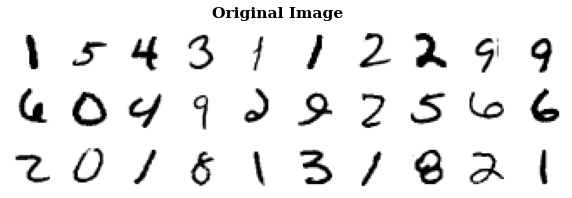

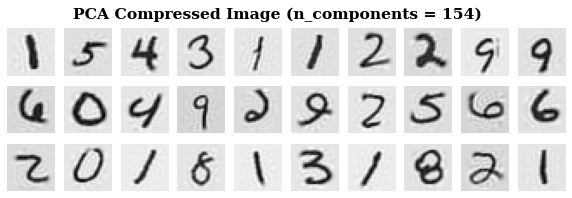

In [9]:
fig = plt.figure(figsize=(10, 3))

for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.axis(False)
    
fig.suptitle("Original Image", weight = "bold")
    
fig = plt.figure(figsize=(10, 3))

for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_recovered[i].reshape(28, 28), cmap = plt.cm.binary)
    plt.axis(False)
    
fig.suptitle("PCA Compressed Image (n_components = 154)", weight = "bold")
    
plt.show()

Looks good!

#### Now, let's quickly try to see if we can cluster the reduced data with PCA by visualizing it on a 2-dimensional space

In [13]:
pca = PCA(n_components = 2)
X_reduced_pca2 = pca.fit_transform(X_reduced_pca)

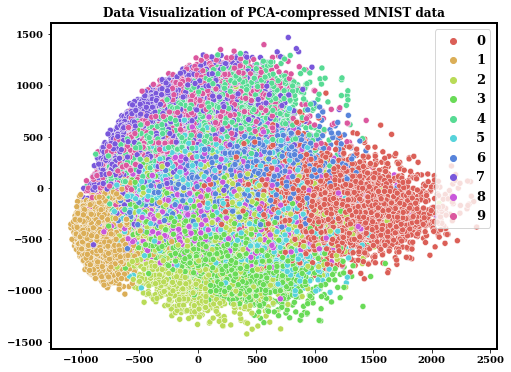

In [15]:
import seaborn as sns

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = X_reduced_pca2[:,0], y = X_reduced_pca2[:,1], hue = y_train,\
                palette = sns.hls_palette(10), legend = 'full')
plt.title("Data Visualization of PCA-compressed MNIST data", weight = "bold", fontsize = 12)
plt.show()

Apparently, PCA alone is not enough to distinguish the compressed images into different clusters. 

### Let's try t-SNE: t-distributed stochastic neighbor embedding

t-SNE is a well-known unsupervised learning method for visualizing high dimension data.

In [16]:
from sklearn.manifold import TSNE

In [17]:
import time

tic = time.time()

tsne = TSNE(n_components = 2, perplexity = 57.0)
X_reduced_tsne = tsne.fit_transform(X_reduced_pca)

toc = time.time()
print(toc-tic)

224.16025590896606


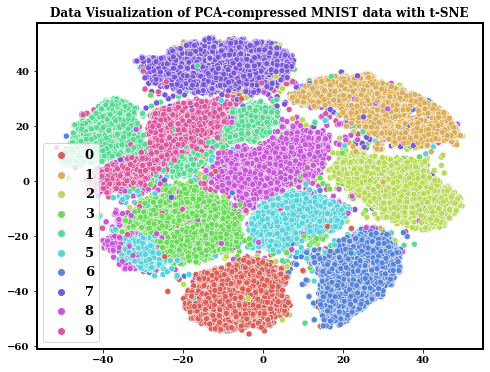

In [18]:
import seaborn as sns

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = X_reduced_tsne[:,0], y = X_reduced_tsne[:,1], hue = y_train,\
                palette = sns.hls_palette(10), legend = 'full')
plt.title("Data Visualization of PCA-compressed MNIST data with t-SNE", weight = "bold", fontsize = 12)
plt.show()

t-SNE actually did an impressive job in clustering the images. It is able to **recognize and cluster most digits within the same class** (Only concern is the 4s divided into two clusters and also a portion of 5s)

### Let's try to classify and label the clusters with K-Means

In [19]:
from sklearn.cluster import KMeans

In [20]:
k = 10
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X_reduced_tsne)

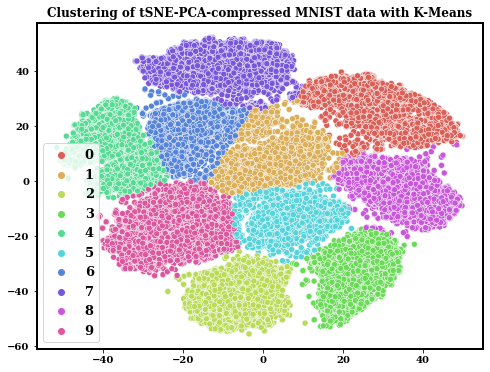

In [21]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = X_reduced_tsne[:,0], y = X_reduced_tsne[:,1], hue = y_pred,\
                palette = sns.hls_palette(10), legend = 'full')
plt.title("Clustering of tSNE-PCA-compressed MNIST data with K-Means", weight = "bold", fontsize = 12)
plt.show()

TA~DA~ **We are able to identify and label the different PCA-tSNE-ed digits via K-Means, with the ability to correctly label 0, 1, 3, 6, 7, 8s.** Producing a well-working auto-encoder for autonomous labeling.

#### Small Suggestions:
- model may be improved with some hyper-paramter search - with more spatially separated clusters and correct 4, 5s.

### Let's also try ```UMAP```, another popular dimension reduction method for visualizig high dimension data.

In [10]:
import umap

In [11]:
help(umap.UMAP())

Help on UMAP in module umap.umap_ object:

class UMAP(sklearn.base.BaseEstimator)
 |  UMAP(n_neighbors=15, n_components=2, metric='euclidean', metric_kwds=None, output_metric='euclidean', output_metric_kwds=None, n_epochs=None, learning_rate=1.0, init='spectral', min_dist=0.1, spread=1.0, low_memory=True, n_jobs=-1, set_op_mix_ratio=1.0, local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, a=None, b=None, random_state=None, angular_rp_forest=False, target_n_neighbors=-1, target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42, transform_mode='embedding', force_approximation_algorithm=False, verbose=False, unique=False, densmap=False, dens_lambda=2.0, dens_frac=0.3, dens_var_shift=0.1, output_dens=False, disconnection_distance=None)
 |  
 |  Uniform Manifold Approximation and Projection
 |  
 |  Finds a low dimensional embedding of the data that approximates
 |  an underlying manifold.
 |  
 |  Parameters
 |

In [24]:
import time
tic = time.time()

x_reduced_ = umap.UMAP(n_neighbors = 27, n_components = 2).fit_transform(X_reduced_pca)

toc = time.time()
print(toc-tic)

18.290132522583008


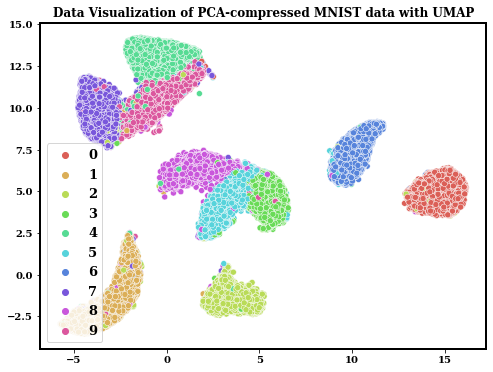

In [25]:
import seaborn as sns

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_reduced_[:,0], y = x_reduced_[:,1], hue = y_train,\
                palette = sns.hls_palette(10), legend = 'full')
plt.title("Data Visualization of PCA-compressed MNIST data with UMAP", weight = "bold", fontsize = 12)
plt.show()

#### From this UMAP actaully did a really great job separating 0, 1, 3, 6s. Comparing to t-SNE results, UMAP seems to have higher accuracy too. Let's first use K-Means to extract these results.

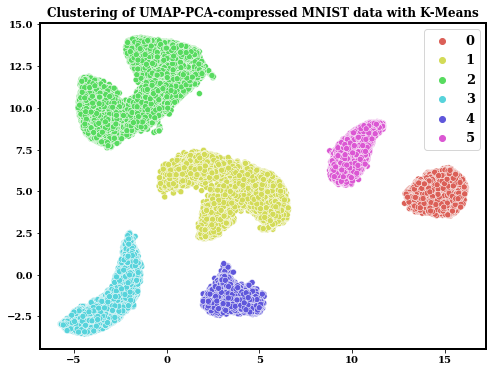

In [27]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters = k, random_state = 89)
y_pred = kmeans.fit_predict(x_reduced_)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_reduced_[:,0], y = x_reduced_[:,1], hue = y_pred,\
                palette = sns.hls_palette(k), legend = 'full')
plt.title("Clustering of UMAP-PCA-compressed MNIST data with K-Means", weight = "bold", fontsize = 12)
plt.show()


Awesome! Now that we can **extract these and send the remaining clusters to 2nd-round UMAP.**

In [32]:
x_round2 = np.concatenate((x_reduced_[y_pred == 1], x_reduced_[y_pred == 2]))
y_round2 = np.concatenate((y_train[y_pred == 1], y_train[y_pred == 2]))

#### Visualize remaining data to be clustered

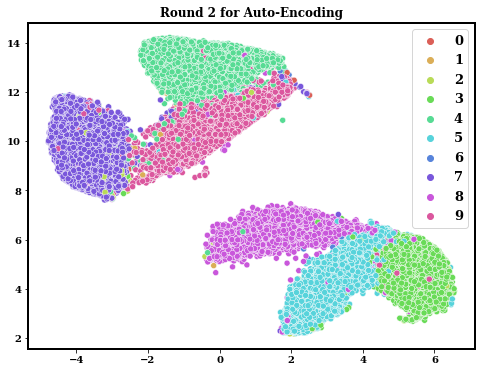

In [34]:
fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_round2[:,0], y = x_round2[:,1], hue = y_round2,\
                palette = sns.hls_palette(10), legend = 'full')
plt.title("Round 2 for Auto-Encoding", weight = "bold", fontsize = 12)
plt.show()

In [51]:
import time
tic = time.time()

x_reduced_2 = umap.UMAP(n_neighbors = 50, n_components = 2).fit_transform(x_round2)

toc = time.time()
print(toc-tic)

21.245424032211304


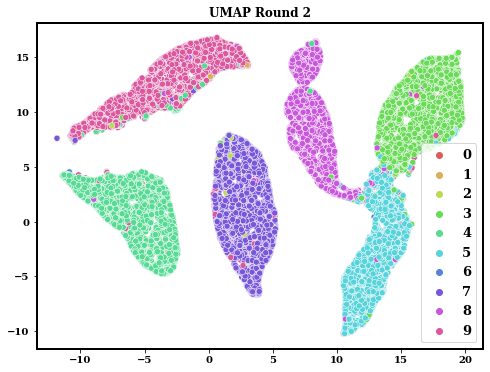

In [52]:
import seaborn as sns

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_reduced_2[:,0], y = x_reduced_2[:,1], hue = y_round2,\
                palette = sns.hls_palette(10), legend = 'full')
plt.title("UMAP Round 2", weight = "bold", fontsize = 12)
plt.show()

#### Upon 2nd round UMAP clustering, we are able to separate reaming digits into distinct clusters with high accuracy!

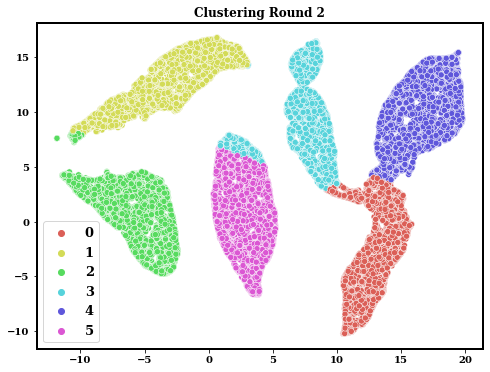

In [56]:
from sklearn.cluster import KMeans

k = 6
kmeans = KMeans(n_clusters = k, random_state = 90)
y_pred = kmeans.fit_predict(x_reduced_2)

fig = plt.figure(figsize = (8, 6))
sns.scatterplot(x = x_reduced_2[:,0], y = x_reduced_2[:,1], hue = y_pred,\
                palette = sns.hls_palette(k), legend = 'full')
plt.title("Clustering Round 2", weight = "bold", fontsize = 12)
plt.show()

## In the end, we are able to classify and label remaining images, and build high-accuracy autoencoder with Unsupervised learning methods - (PCA-UMAP-KMeans)!

### Additional Hyperparamter Screening for UMAP
---

15.264701843261719
16.309980154037476
17.581756114959717
18.335123300552368


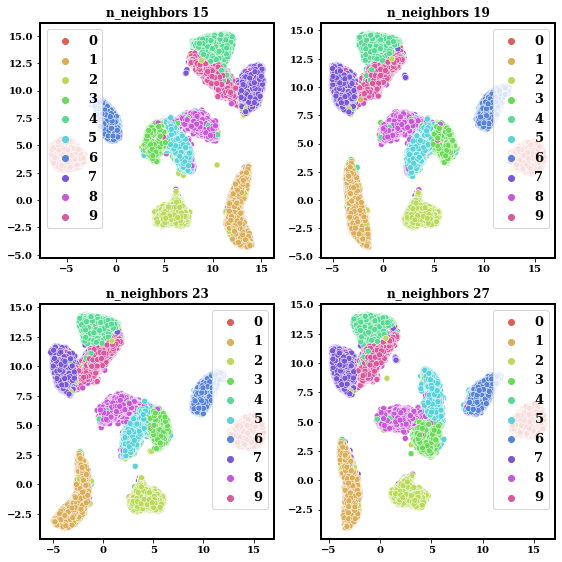

In [22]:
import time
import seaborn as sns

fig = plt.figure(figsize = (8, 8))

for i in range(4):
    
    tic = time.time()
    x_reduced_umap = umap.UMAP(n_neighbors = 15 + 4 * i, n_components = 2).fit_transform(X_reduced_pca)
    toc = time.time()
    
    print(toc-tic)
    
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x = x_reduced_umap[:,0], y = x_reduced_umap[:,1], hue = y_train,\
                    palette = sns.hls_palette(10), legend = 'full')
    plt.title("n_neighbors {:d}".format(15 + 4 * i), weight = "bold", fontsize = 12)

plt.tight_layout()

plt.show()

19.337493658065796
19.969501495361328
32.24376392364502
22.16658616065979
23.349201202392578
36.51474165916443
25.91605567932129
26.93927264213562
28.68915867805481


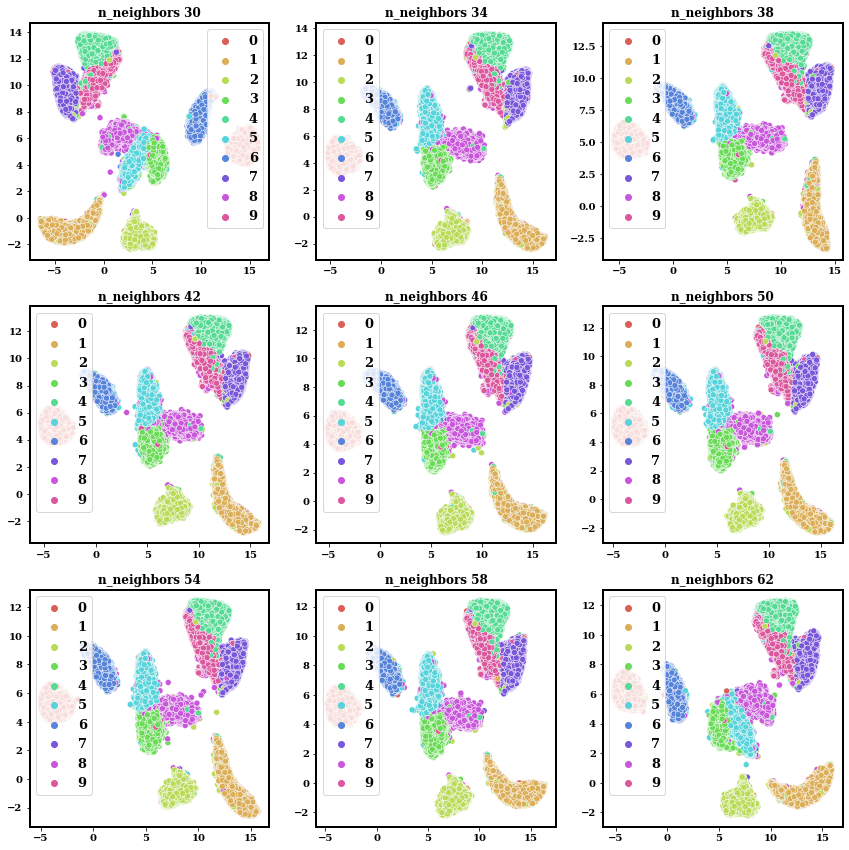

In [23]:
import time
import seaborn as sns

fig = plt.figure(figsize = (12, 12))

for i in range(9):
    
    tic = time.time()
    x_reduced_umap = umap.UMAP(n_neighbors = 30 + 4 * i, n_components = 2).fit_transform(X_reduced_pca)
    toc = time.time()
    
    print(toc-tic)
    
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x = x_reduced_umap[:,0], y = x_reduced_umap[:,1], hue = y_train,\
                    palette = sns.hls_palette(10), legend = 'full')
    plt.title("n_neighbors {:d}".format(30 + 4 * i), weight = "bold", fontsize = 12)

plt.tight_layout()

plt.show()

### Additional Hyperparamter Screening for t-SNE
---

188.82007145881653
197.72256183624268
201.98575115203857
205.55297231674194
211.40567088127136
217.21256065368652
222.1952784061432
225.42125701904297
231.50539565086365


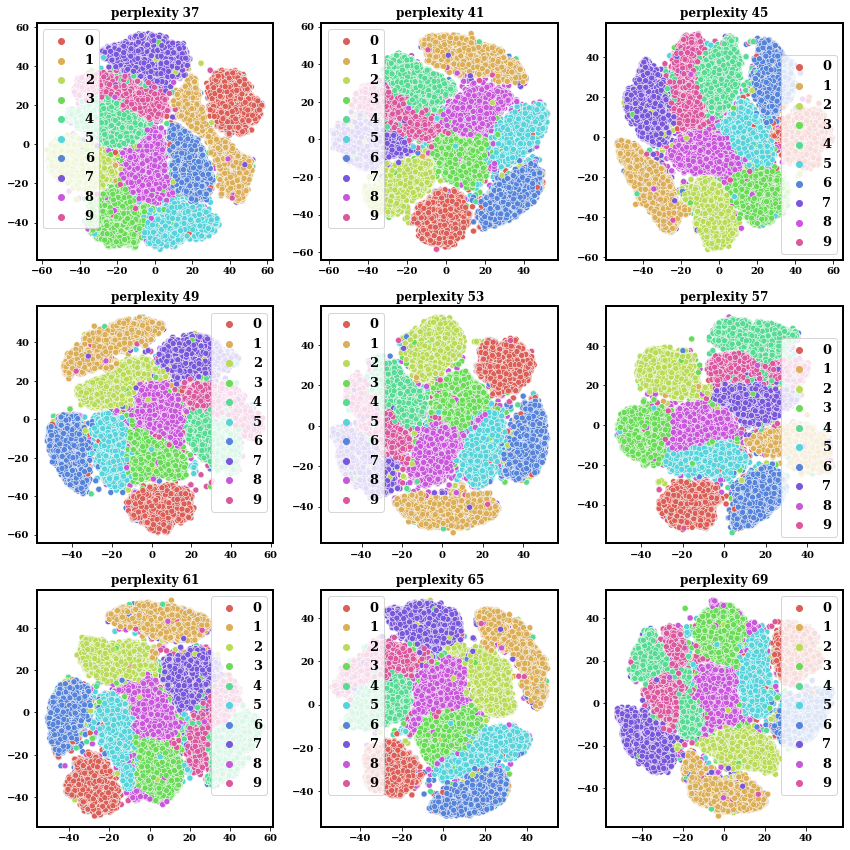

In [10]:
import time
import seaborn as sns

fig = plt.figure(figsize = (12, 12))

for i in range(9):
    
    tic = time.time()
    tsne = TSNE(n_components = 2, perplexity = float(37 + 4 * i))
    X_reduced_tsne = tsne.fit_transform(X_reduced_pca)
    toc = time.time()
    
    print(toc-tic)
    
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x = X_reduced_tsne[:,0], y = X_reduced_tsne[:,1], hue = y_train,\
                    palette = sns.hls_palette(10), legend = 'full')
    plt.title("perplexity {:d}".format(37 + 4*i), weight = "bold", fontsize = 12)

plt.tight_layout()

plt.show()